# Random Forest Regressor (RFR)

## 0.0 Python packages

In [1]:
# Packages for preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Packages for modeling
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Packages for the training and testing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

In [4]:
# Packages for model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from numpy import mean
from numpy import absolute

## 1.0 Pre-processing

### 1.1 Dataset

In [5]:
# Import the dataset
annual_df = pd.read_csv("data/total-amount-of-food-waste-annually-in-malaysia.csv")
annual_df

,Year,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,Amount_in_tonnes,6205000,6207555,6237006,6191860,6051700,6091120,5490000,5475000,2920000,5475000,3864960,339450,254590,169725


In [6]:
#Transpose the dataframe
annual_df = annual_df.transpose()
annual_df

,0
Year,Amount_in_tonnes
2022,6205000
2021,6207555
2020,6237006
2019,6191860
2018,6051700
2017,6091120
2016,5490000
2015,5475000
2014,2920000


In [7]:
# Sorting the dataframe by Year column
annual_df = annual_df.reset_index()
annual_df.columns = annual_df.iloc[0]
annual_df = annual_df.drop(0)
annual_df = annual_df.sort_values(by = 'Year', ascending = True)
annual_df = annual_df.reset_index()
annual_df.drop(annual_df.columns[0], axis = 1, inplace = True)
annual_df

,Year,Amount_in_tonnes
0,2009,169725
1,2010,254590
2,2011,339450
3,2012,3864960
4,2013,5475000
5,2014,2920000
6,2015,5475000
7,2016,5490000
8,2017,6091120
9,2018,6051700


### 1.2 Exploratory Data Analysis

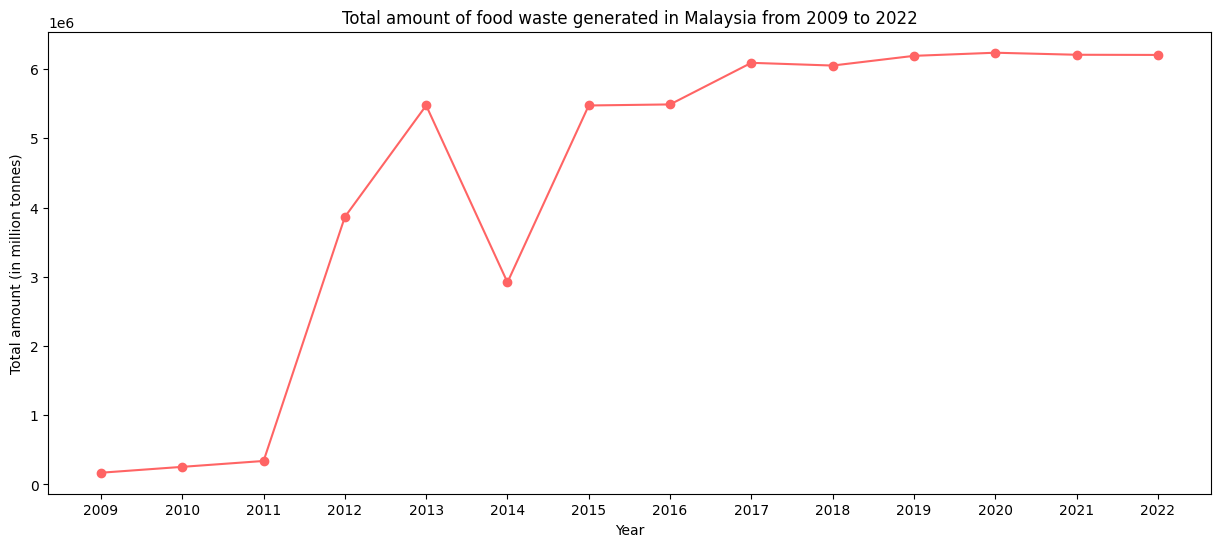

In [8]:
yearAn = list(annual_df['Year'])
amountAn = list(annual_df['Amount_in_tonnes'])

plt.figure(figsize = (15, 6))
lines = plt.plot(yearAn, amountAn)
plt.setp(lines, color = (255/255, 100/255, 100/255), marker = 'o')
plt.xlabel("Year")
plt.ylabel("Total amount (in million tonnes)")
plt.title("Total amount of food waste generated in Malaysia from 2009 to 2022")
plt.show()

## 2.0 Modelling

In [9]:
# Constant for the RFR model parameters
RFR_num_estmtr = 100
RFR_ran_st = 0

### 2.1 Memory recall

#### (a) All used for training and testing

x_train = x_test = Year (2009 - 2022) <br>
y_train = y_test = Amount_in_tonnes (2009 - 2022) <br>

In [10]:
# Create the training and testing set
x_train = annual_df.iloc[:, 0:1].values.astype(float)
y_train = annual_df.iloc[:, 1:2].values.astype(float)
x_test = x_train
y_test = y_train

In [11]:
# Feature scaling
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(x_train)
Y = sc_Y.fit_transform(y_train)
Y = Y.ravel() # flatten y_train data

In [12]:
# Create the RFR model
RFRmodel_memRec1 = RandomForestRegressor(n_estimators = RFR_num_estmtr, random_state = RFR_ran_st)

In [13]:
# Train the model with training set
RFRmodel_memRec1.fit(X, Y) 

RandomForestRegressor(random_state=0)

In [14]:
# Make prediction with testing set
memRec1_pred = sc_Y.inverse_transform(
            RFRmodel_memRec1.predict(
                sc_X.transform(x_test)
            ).reshape(-1, 1)
        )
memRec1_pred

array([[ 305926.75],
       [ 361937.15],
       [ 581491.5 ],
       [3075635.45],
       [4830186.1 ],
       [3814400.  ],
       [4912894.8 ],
       [5476628.4 ],
       [5925827.2 ],
       [6100826.72],
       [6154022.05],
       [6228177.32],
       [6215968.04],
       [6207828.07]])

In [15]:
# Evaluate the model performance
mae = mean_absolute_error(y_test, memRec1_pred)
rmse = mean_squared_error(y_test, memRec1_pred, squared = False)
mape = mean_absolute_percentage_error(y_test, memRec1_pred)

print("mean_absolute_error: {:.2f} tonnes".format(mae))
print("root_mean_squared_error: {:.2f} tonnes".format(rmse))
print("mean_absolute_percentage_error: {:.2f}%".format(mape * 100))

mean_absolute_error: 261566.64 tonnes
root_mean_squared_error: 403103.37 tonnes
mean_absolute_percentage_error: 19.39%


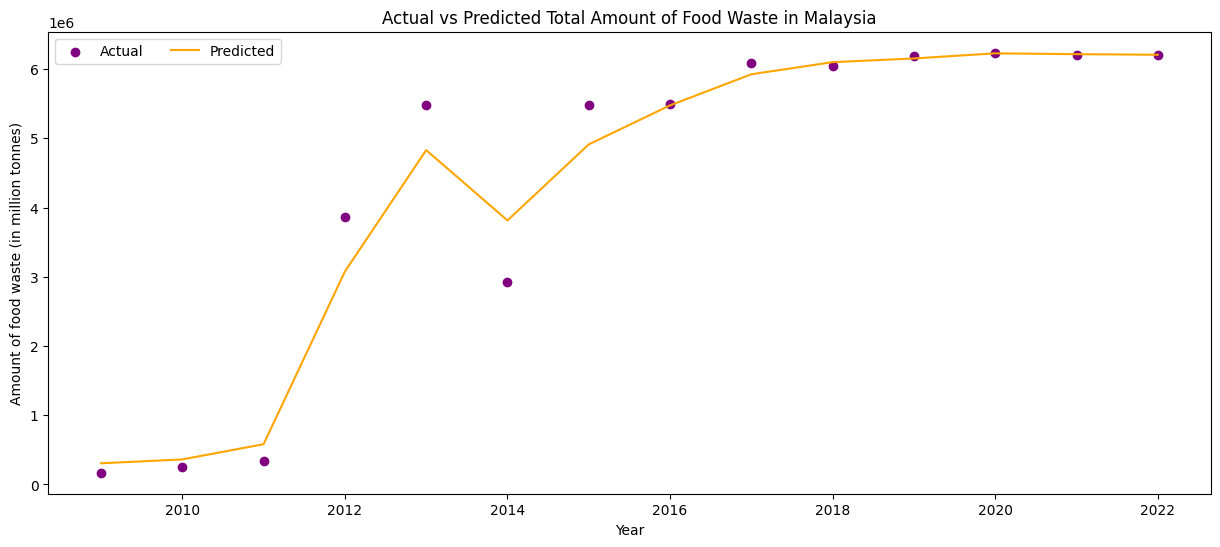

In [16]:
# Visualize actual and predicted values
plt.figure(figsize = (15, 6))
plt.scatter(x_train, y_train, color = 'purple', label = 'Actual')
plt.plot(x_test, memRec1_pred, color = 'orange', label = 'Predicted')
plt.legend(loc = 'upper left', ncol = 2, bbox_to_anchor = (0., 1.))
plt.title('Actual vs Predicted Total Amount of Food Waste in Malaysia')
plt.xlabel('Year')
plt.ylabel('Amount of food waste (in million tonnes)')
plt.show()

#### (b) All used for testing, except for training (excluding 2022)

x_train = Year (2009 - 2021) <br>
x_test = Year (2009 - 2022) <br>
y_train = Amount_in_tonnes (2009 - 2021) <br>
y_test = Amount_in_tonnes (2009 - 2022) <br>

In [17]:
# Create the training and testing set
x_train = annual_df.iloc[:13, 0:1].values.astype(float)
y_train = annual_df.iloc[:13, 1:2].values.astype(float)
x_test = annual_df.iloc[:, 0:1].values.astype(float)
y_test = annual_df.iloc[:, 1:2].values.astype(float)

In [18]:
# Feature scaling
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(x_train)
Y = sc_Y.fit_transform(y_train)
Y = Y.ravel() # flatten y_train data

In [19]:
# Create the RFR model
RFRmodel_memRec2 = RandomForestRegressor(n_estimators = RFR_num_estmtr, random_state = RFR_ran_st)

In [20]:
# Train the model with training set
RFRmodel_memRec2.fit(X, Y) 

RandomForestRegressor(random_state=0)

In [21]:
# Make prediction with testing set
memRec2_pred = sc_Y.inverse_transform(
            RFRmodel_memRec2.predict(
                sc_X.transform(x_test)
            ).reshape(-1, 1)
        )
memRec2_pred

array([[ 279272.65],
       [ 317461.9 ],
       [1221653.  ],
       [2988176.25],
       [4662892.1 ],
       [3839950.  ],
       [4888250.  ],
       [5508489.6 ],
       [5920360.2 ],
       [6102565.26],
       [6156112.36],
       [6225292.68],
       [6212902.04],
       [6212902.04]])

In [22]:
# Evaluate the model performance
mae = mean_absolute_error(y_test, memRec2_pred)
rmse = mean_squared_error(y_test, memRec2_pred, squared = False)
mape = mean_absolute_percentage_error(y_test, memRec2_pred)

print("mean_absolute_error: {:.2f} tonnes".format(mae))
print("root_mean_squared_error: {:.2f} tonnes".format(rmse))
print("mean_absolute_percentage_error: {:.2f}%".format(mape * 100))

mean_absolute_error: 325074.21 tonnes
root_mean_squared_error: 496176.99 tonnes
mean_absolute_percentage_error: 30.99%


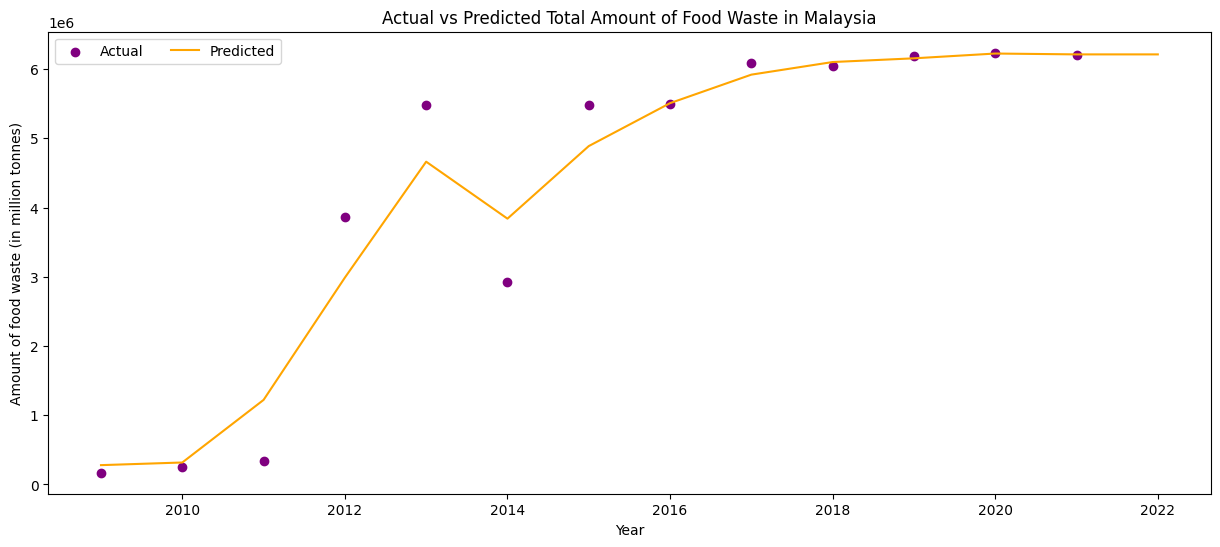

In [23]:
# Visualize actual and predicted values
plt.figure(figsize = (15, 6))
plt.scatter(x_train, y_train, color = 'purple', label = 'Actual')
plt.plot(x_test, memRec2_pred, color = 'orange', label = 'Predicted')
plt.legend(loc = 'upper left', ncol = 2, bbox_to_anchor = (0., 1.))
plt.title('Actual vs Predicted Total Amount of Food Waste in Malaysia')
plt.xlabel('Year')
plt.ylabel('Amount of food waste (in million tonnes)')
plt.show()

### 2.2 Hold-out

#### (a) 80% training to 20% testing

In [24]:
# Prepare the datset to be split
x = annual_df.iloc[:, 0:1].values.astype(float)
y = annual_df.iloc[:, 1:2].values.astype(float)

In [25]:
# Split the data to selected hold-out ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = False)
y_train = y_train.ravel()

In [26]:
# Create the RFR model
RFRmodel_hout1 = RandomForestRegressor(n_estimators = RFR_num_estmtr, random_state = RFR_ran_st)

In [27]:
# Train the model with training set
RFRmodel_hout1.fit(x_train, y_train) 

RandomForestRegressor(random_state=0)

In [28]:
# Make prediction with testing set
hout1_pred = RFRmodel_hout1.predict(x_test)
hout1_pred

array([6142749.6, 6142749.6, 6142749.6])

In [29]:
# Evaluate the model performance
mae = mean_absolute_error(y_test, hout1_pred)
rmse = mean_squared_error(y_test, hout1_pred, squared = False)
mape = mean_absolute_percentage_error(y_test, hout1_pred)

print("mean_absolute_error: {:.2f} tonnes".format(mae))
print("root_mean_squared_error: {:.2f} tonnes".format(rmse))
print("mean_absolute_percentage_error: {:.2f}%".format(mape * 100))

mean_absolute_error: 73770.73 tonnes
root_mean_squared_error: 75186.70 tonnes
mean_absolute_percentage_error: 1.19%


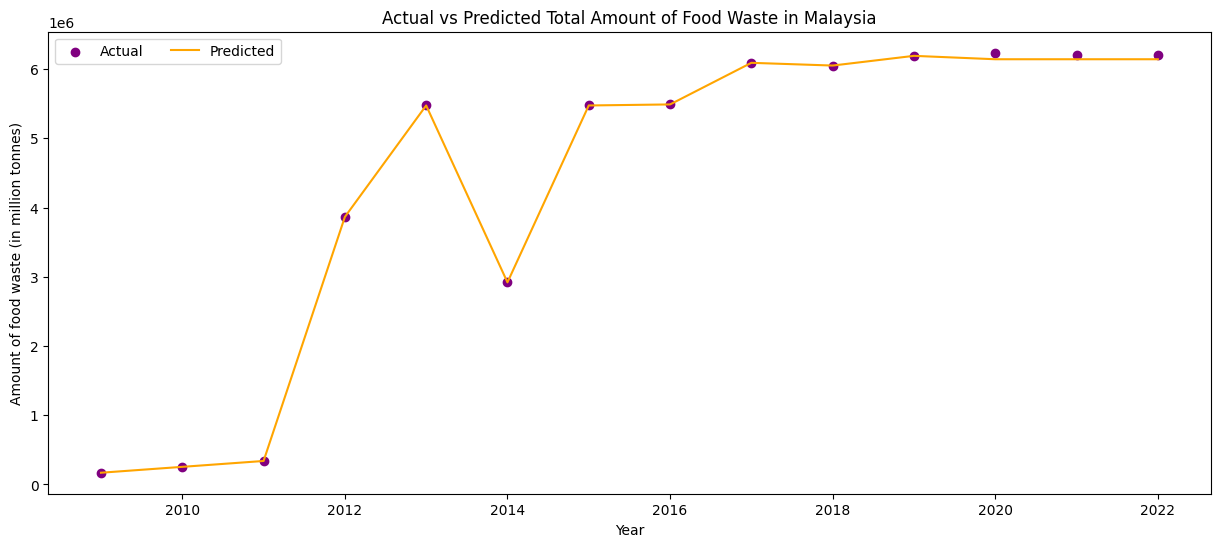

In [30]:
y_predicted = np.concatenate((y_train, hout1_pred))

plt.figure(figsize = (15, 6))
plt.scatter(x, y, color = 'purple', label = 'Actual')
plt.plot(x, y_predicted, color = 'orange', label = 'Predicted')
plt.legend(loc = 'upper left', ncol = 2, bbox_to_anchor = (0., 1.))
plt.title('Actual vs Predicted Total Amount of Food Waste in Malaysia')
plt.xlabel('Year')
plt.ylabel('Amount of food waste (in million tonnes)')
plt.show()

#### (a) 90% training to 10% testing

In [31]:
# Prepare the datset to be split
x = annual_df.iloc[:, 0:1].values.astype(float)
y = annual_df.iloc[:, 1:2].values.astype(float)

In [32]:
# Split the data to selected hold-out ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, shuffle = False)
y_train = y_train.ravel()

In [33]:
# Create the RFR model
RFRmodel_hout2 = RandomForestRegressor(n_estimators = RFR_num_estmtr, random_state = RFR_ran_st)

In [34]:
# Train the model with training set
RFRmodel_hout2.fit(x_train, y_train) 

RandomForestRegressor(random_state=0)

In [35]:
# Make prediction with testing set
hout2_pred = RFRmodel_hout2.predict(x_test)
hout2_pred

array([6220807.06, 6220807.06])

In [36]:
# Evaluate the model performance
mae = mean_absolute_error(y_test, hout2_pred)
rmse = mean_squared_error(y_test, hout2_pred, squared = False)
mape = mean_absolute_percentage_error(y_test, hout2_pred)

print("mean_absolute_error: {:.2f} tonnes".format(mae))
print("root_mean_squared_error: {:.2f} tonnes".format(rmse))
print("mean_absolute_percentage_error: {:.2f}%".format(mape * 100))

mean_absolute_error: 14529.56 tonnes
root_mean_squared_error: 14585.61 tonnes
mean_absolute_percentage_error: 0.23%


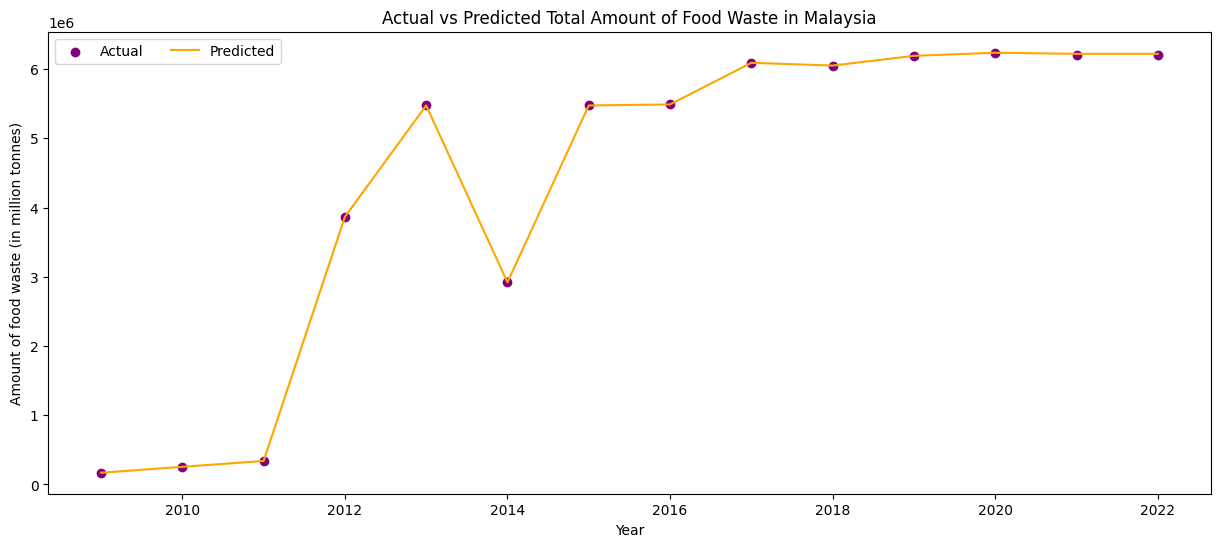

In [37]:
y_predicted = np.concatenate((y_train, hout2_pred))

plt.figure(figsize = (15, 6))
plt.scatter(x, y, color = 'purple', label = 'Actual')
plt.plot(x, y_predicted, color = 'orange', label = 'Predicted')
plt.legend(loc = 'upper left', ncol = 2, bbox_to_anchor = (0., 1.))
plt.title('Actual vs Predicted Total Amount of Food Waste in Malaysia')
plt.xlabel('Year')
plt.ylabel('Amount of food waste (in million tonnes)')
plt.show()

#### (c)(i) Test random_state {1 - 100}

In [38]:
# Create the RFR model
RFRmodel_hout3 = RandomForestRegressor(n_estimators = RFR_num_estmtr, random_state = RFR_ran_st)

In [39]:
# For (c)(ii)
y_pred_dict = dict()
mae_dict = dict()
rmse_dict = dict()
mape_dict = dict()

# Find overall mean from model 1 until model 100
mae_mean = 0
rmse_mean = 0
mape_mean = 0

for a in range(1, 101):
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = a)
    y_train = y_train.ravel()
    
    # Train the model
    RFRmodel_hout3.fit(x_train, y_train)
    
    # Test the model
    y_pred = RFRmodel_hout3.predict(x_test)
    y_pred_dict[a] = y_pred
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mae_dict[a] = mae
    mae_mean += mae
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    rmse_dict[a] = rmse
    rmse_mean += rmse
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mape_dict[a] = mape
    mape_mean += mape

In [40]:
print("Mean of Mean Absolute Error from model 1 to model 100: {:.2f} tonnes".format(mae_mean / 100))
print("Mean of Root Mean Squared Error from model 1 to model 100: {:.2f} tonnes".format(rmse_mean / 100))
print("Mean of Mean Absolute Percentage Error from model 1 to model 100: {:.2f}%".format((mape_mean / 100) * 100))

Mean of Mean Absolute Error from model 1 to model 100: 796582.90 tonnes
Mean of Root Mean Squared Error from model 1 to model 100: 1033209.03 tonnes
Mean of Mean Absolute Percentage Error from model 1 to model 100: 97.49%


#### (c)(ii) Test random_state with  lowest value

In [41]:
# Get key with min value.
mae_min = min(mae_dict, key = mae_dict.get)
rmse_min = min(rmse_dict, key = rmse_dict.get)
mape_min = min(mape_dict, key = mape_dict.get)

print(mae_min)
print(rmse_min)
print(mape_min)

12
12
12


In [42]:
# Prepare the datset to be split
x = annual_df.iloc[:, 0:1].values.astype(float)
y = annual_df.iloc[:, 1:2].values.astype(float)

In [43]:
# Split the data to selected hold-out ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = False)
y_train = y_train.ravel()

In [44]:
# Create the RFR model
RFRmodel_hout4 = RandomForestRegressor(n_estimators = RFR_num_estmtr, random_state = RFR_ran_st)

In [45]:
# Train the model with training set
RFRmodel_hout4.fit(x_train, y_train) 

RandomForestRegressor(random_state=0)

In [46]:
# Make prediction with testing set
hout4_pred = RFRmodel_hout4.predict(x_test)
hout4_pred

array([6142749.6, 6142749.6, 6142749.6])

In [47]:
# Evaluate the model performance
mae = mean_absolute_error(y_test, hout4_pred)
rmse = mean_squared_error(y_test, hout4_pred, squared = False)
mape = mean_absolute_percentage_error(y_test, hout4_pred)

print("mean_absolute_error: {:.2f} tonnes".format(mae))
print("root_mean_squared_error: {:.2f} tonnes".format(rmse))
print("mean_absolute_percentage_error: {:.2f}%".format(mape * 100))

mean_absolute_error: 73770.73 tonnes
root_mean_squared_error: 75186.70 tonnes
mean_absolute_percentage_error: 1.19%


In [48]:
# Combine training set and testing set
x_concat = np.concatenate((x_train, x_test))
y_predicted = np.concatenate((y_train, y_pred))

# Flatten x and y set
x_concat = x_concat.ravel()
y_predicted = y_predicted.ravel()

In [49]:
# Creating a temporary dataframe
temp_df = pd.DataFrame(data = [x_concat, y_predicted], dtype = float)
temp_df = temp_df.transpose()
temp_df = temp_df.rename(columns = {0: 'Year', 1: 'Amount'})
temp_df = temp_df.sort_values(by = 'Year', ascending = True)
temp_df

,Year,Amount
0,2009.0,169725.0
1,2010.0,254590.0
2,2011.0,339450.0
3,2012.0,3864960.0
4,2013.0,5475000.0
5,2014.0,2920000.0
6,2015.0,5475000.0
7,2016.0,5490000.0
8,2017.0,6091120.0
9,2018.0,6051700.0


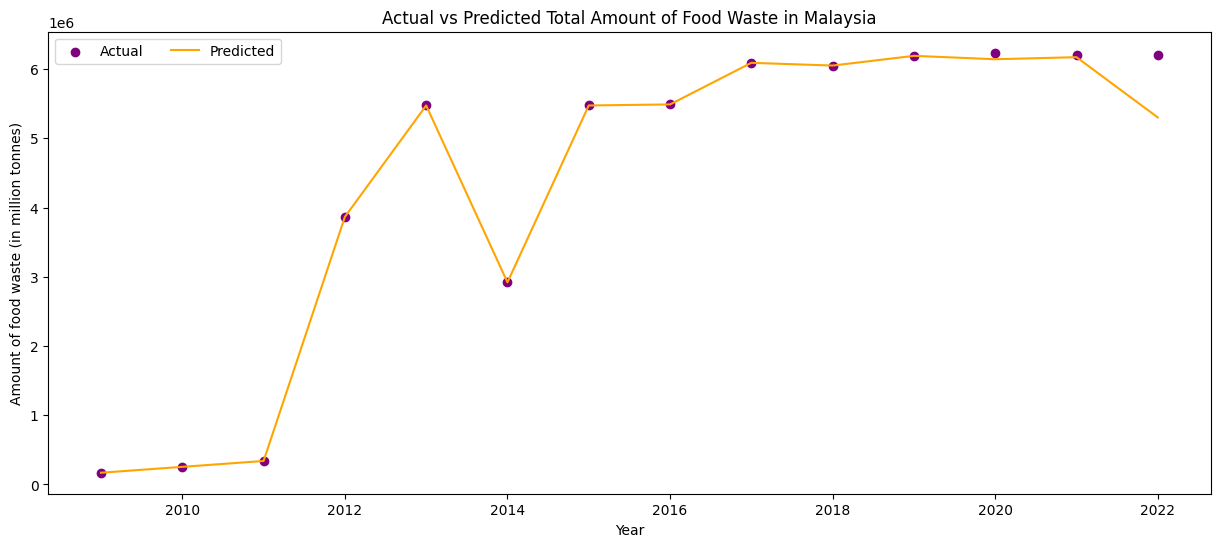

In [50]:
y_temp = list(temp_df['Amount'])

plt.figure(figsize = (15, 6))
plt.scatter(x, y, color = 'purple', label = 'Actual')
plt.plot(x, y_temp, color = 'orange', label = 'Predicted')
plt.legend(loc = 'upper left', ncol = 2, bbox_to_anchor = (0., 1.))
plt.title('Actual vs Predicted Total Amount of Food Waste in Malaysia')
plt.xlabel('Year')
plt.ylabel('Amount of food waste (in million tonnes)')
plt.show()

### 2.3 K-fold cross validation

In [51]:
# Prepare the datset to be split
x = annual_df.iloc[:, 0:1].values.astype(float)
y = annual_df.iloc[:, 1:2].values.astype(float)
y = y.ravel() # flatten y (dependent) data

In [52]:
# Create the RFR model
RFRmodel_kfold = RandomForestRegressor(n_estimators = RFR_num_estmtr, random_state = RFR_ran_st)

In [53]:
# Create the k-fold object
kfold = KFold(n_splits = 7, shuffle = False)

In [54]:
results1 = cross_validate(RFRmodel_kfold, x, y, scoring = 'neg_mean_absolute_error', cv = kfold)

for a in range(len(results1['test_score'])):
    print(f"The mean absolute error score for fold %d: {results1['test_score'][a]}" % (a + 1))

print(f"The average of mean absolute error for all 7 models is %.2f tonnes" % mean(absolute(results1['test_score'])))

The mean absolute error score for fold 1: -1525534.8
The mean absolute error score for fold 2: -333000.32500000007
The mean absolute error score for fold 3: -2253615.9749999996
The mean absolute error score for fold 4: -933006.9000000001
The mean absolute error score for fold 5: -335771.65500000026
The mean absolute error score for fold 6: -94074.5
The mean absolute error score for fold 7: -14529.55999999959
The average of mean absolute error for all 7 models is 784219.10 tonnes


In [55]:
results2 = cross_validate(RFRmodel_kfold, x, y, scoring = 'neg_root_mean_squared_error', cv = kfold)

for a in range(len(results2['test_score'])):
    print(f"The root mean squared error score for fold %d: {results2['test_score'][a]}" % (a + 1))

print(f"The average of root mean squared error for all 7 models is %.2f tonnes" % mean(absolute(results2['test_score'])))

The root mean squared error score for fold 1: -1526124.8124145318
The root mean squared error score for fold 2: -333311.4928274621
The root mean squared error score for fold 3: -2263071.580261411
The root mean squared error score for fold 4: -1171330.3110216607
The root mean squared error score for fold 5: -443799.93264943856
The root mean squared error score for fold 6: -96881.55611410258
The root mean squared error score for fold 7: -14585.613461338817
The average of root mean squared error for all 7 models is 835586.47 tonnes


In [56]:
results3 = cross_validate(RFRmodel_kfold, x, y, scoring = 'neg_mean_absolute_percentage_error', cv = kfold)

for a in range(len(results3['test_score'])):
    print(f"The mean absolute percentage error score for fold %d: {results3['test_score'][a]}" % (a + 1))

print(f"The average of mean absolute percentage error for all 7 models is %.2f" % (mean(absolute(results3['test_score'])) * 100))

The mean absolute percentage error score for fold 1: -7.531867602229749
The mean absolute percentage error score for fold 2: -0.5142325018011287
The mean absolute percentage error score for fold 3: -0.5751889634703196
The mean absolute percentage error score for fold 4: -0.17035611937021236
The mean absolute percentage error score for fold 5: -0.055149148341968914
The mean absolute percentage error score for fold 6: -0.015151798925485412
The mean absolute percentage error score for fold 7: -0.002341149517757873
The average of mean absolute percentage error for all 7 models is 126.63


### 2.4 Leave-One-Out cross validation

In [57]:
# Prepare the datset to be split
x = annual_df.iloc[:, 0:1].values.astype(float)
y = annual_df.iloc[:, 1:2].values.astype(float)
y = y.ravel() # flatten y (dependent) data

In [58]:
# Create the RFR model
RFRmodel_loout = RandomForestRegressor(n_estimators = RFR_num_estmtr, random_state = RFR_ran_st)

In [59]:
# Create the leave-one-out object
loo = LeaveOneOut()
loo.get_n_splits(x)

14

In [60]:
results1 = cross_validate(RFRmodel_loout, x, y, scoring = 'neg_mean_absolute_error', cv = loo)

for a in range(len(results1['test_score'])):
    print(f"The mean absolute error score for fold %d: {results1['test_score'][a]}" % (a + 1))

print(f"The average of mean absolute error for all 14 models is %.2f tonnes" % mean(absolute(results1['test_score'])))

The mean absolute error score for fold 1: -465759.9
The mean absolute error score for fold 2: -327429.94999999995
The mean absolute error score for fold 3: -663474.25
The mean absolute error score for fold 4: -2282447.4
The mean absolute error score for fold 5: -2147273.45
The mean absolute error score for fold 6: -2465008.8
The mean absolute error score for fold 7: -1625438.7999999998
The mean absolute error score for fold 8: -65665.0
The mean absolute error score for fold 9: -453173.33999999985
The mean absolute error score for fold 10: -14880.78000000026
The mean absolute error score for fold 11: -74691.0700000003
The mean absolute error score for fold 12: -47233.799999999814
The mean absolute error score for fold 13: -19343.679999999702
The mean absolute error score for fold 14: -7902.040000000037
The average of mean absolute error for all 14 models is 761408.73 tonnes


In [61]:
results2 = cross_validate(RFRmodel_loout, x, y, scoring = 'neg_root_mean_squared_error', cv = loo)

for a in range(len(results2['test_score'])):
    print(f"The root mean squared error score for fold %d: {results2['test_score'][a]}" % (a + 1))

print(f"The average of root mean squared error for all 14 models is %.2f tonnes" % mean(absolute(results2['test_score'])))

The root mean squared error score for fold 1: -465759.9
The root mean squared error score for fold 2: -327429.94999999995
The root mean squared error score for fold 3: -663474.25
The root mean squared error score for fold 4: -2282447.4
The root mean squared error score for fold 5: -2147273.45
The root mean squared error score for fold 6: -2465008.8
The root mean squared error score for fold 7: -1625438.7999999998
The root mean squared error score for fold 8: -65665.0
The root mean squared error score for fold 9: -453173.33999999985
The root mean squared error score for fold 10: -14880.78000000026
The root mean squared error score for fold 11: -74691.0700000003
The root mean squared error score for fold 12: -47233.799999999814
The root mean squared error score for fold 13: -19343.679999999702
The root mean squared error score for fold 14: -7902.040000000037
The average of root mean squared error for all 14 models is 761408.73 tonnes


In [62]:
results3 = cross_validate(RFRmodel_loout, x, y, scoring = 'neg_mean_absolute_percentage_error', cv = loo)

for a in range(len(results3['test_score'])):
    print(f"The mean absolute percentage error score for fold %d: {results3['test_score'][a]}" % (a + 1))

print(f"The average of mean absolute percentage error for all 14 models is %.2f" % (mean(absolute(results3['test_score'])) * 100))

The mean absolute percentage error score for fold 1: -2.744203269995581
The mean absolute percentage error score for fold 2: -1.2861068777249693
The mean absolute percentage error score for fold 3: -1.954556635734276
The mean absolute percentage error score for fold 4: -0.5905487767014406
The mean absolute percentage error score for fold 5: -0.3921960639269407
The mean absolute percentage error score for fold 6: -0.8441810958904109
The mean absolute percentage error score for fold 7: -0.29688379908675794
The mean absolute percentage error score for fold 8: -0.011960837887067395
The mean absolute percentage error score for fold 9: -0.07439901692956301
The mean absolute percentage error score for fold 10: -0.0024589421154386803
The mean absolute percentage error score for fold 11: -0.012062784042274906
The mean absolute percentage error score for fold 12: -0.00757315288777978
The mean absolute percentage error score for fold 13: -0.003116151206070619
The mean absolute percentage error sc